<a href="https://colab.research.google.com/github/arsyiadlani/rock-paper-scissor-classifier/blob/master/CNN_RockPaperScissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA RETRIEVING AND PREPROCESSING

In [0]:
import os
from zipfile import ZipFile

# Retrieve image datasets
! wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

# Unzip retrieved image datasets
zip_address = "/tmp/rockpaperscissors.zip"
zip_reader = ZipFile(zip_address, "r")
zip_reader.extractall("/tmp")
zip_reader.close()

--2020-06-01 08:20:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.71MB/s    in 40s     

2020-06-01 08:20:52 (7.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# IMAGE DATA PREPROCESSING

In [0]:
import os

base_dir = "/tmp/rockpaperscissors"
train_dir = os.path.join(base_dir, "rps-cv-images")

# Remove README txt file in the train_dir directory
if os.path.exists("/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt"):
  os.remove("/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt")
else:
  print("File 'README_rpc-cv-images.txt' had been removed")
  
os.listdir(train_dir)

['rock', 'paper', 'scissors']

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   validation_split = 0.2,  # Split dataset into training (80%) and validation (20%) dataset
                                   fill_mode = "nearest")

train_img = img_generator.flow_from_directory(
    train_dir,
    subset="training",  # Set as training dataset
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical")  # For multi-class classification purpose

val_img = img_generator.flow_from_directory(
    train_dir,
    subset="validation",  # Set as validation dataset
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical")  # For multi-class clasification purpose

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# MODEL TUNING AND STRUCTURING

In [0]:
import tensorflow as tf
from time import time
from tensorflow.keras.optimizers import Adam

# Learning process start time
start_time = time()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),  # Keep the model from overfitting
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()  # Review CNN architecture of the model

model.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate=0.001), metrics = ["accuracy"])

fitting = model.fit(
          train_img,
          steps_per_epoch = 55,
          epochs = 20,
          validation_data = val_img,
          validation_steps = 14,
          verbose = 2
          )  # Output variable 'fitting' will be needed for later visualization purposes

training_time = round((time()-start_time) / 60, 3)  # Count training time in minutes

print(f"Training Time: {training_time} minutes")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

KeyboardInterrupt: ignored

# MODEL LOSS AND ACCURACY VISUALIZATION

LOSS VISUALIZATION

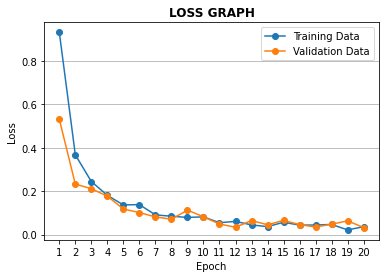

In [0]:
"""Plot training and validation loss during learning process."""

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

epochs = list(range(1,21))
plt.plot(epochs, fitting.history["loss"], marker = "o", label = "Training Data")  # Plot training loss
plt.plot(epochs, fitting.history["val_loss"], marker = "o", label = "Validation Data")  # Plot validation loss

plt.title("LOSS GRAPH", weight="bold")
plt.xticks(epochs)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(b=1, axis="y")  # Show graph grid
plt.legend()

plt.show()

ACCURACY VISUALIZATION

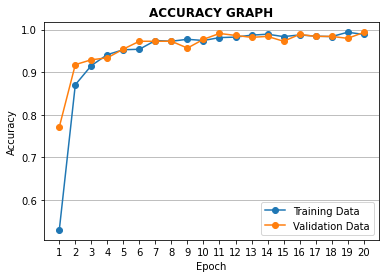

In [0]:
"""Plot training and validation accuracy during learning process."""

import matplotlib.pyplot as plt

epochs = list(range(1,21))
plt.plot(epochs, fitting.history["accuracy"], marker = "o", label = "Training Data")  # Plot training accuracy
plt.plot(epochs, fitting.history["val_accuracy"], marker = "o", label = "Validation Data")  # Plot validation accuracy

plt.title("ACCURACY GRAPH", weight="bold")
plt.xticks(epochs)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(b=1, axis="y")  # Show graph grid
plt.legend()

plt.show()

# IMAGE PREDICTING

Saving GQjExZ14HfbKjnEp.png to GQjExZ14HfbKjnEp (1).png
GQjExZ14HfbKjnEp.png
Batu


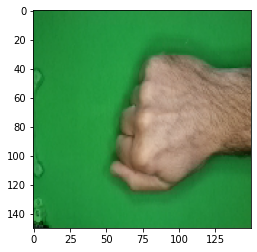

In [0]:
"""Receive image as an input and classify the image using trained model."""

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image

upload_img = files.upload()

for path in upload_img.keys():
  uploaded_img = image.load_img(path, target_size=[150, 150])
  img_array = image.img_to_array(uploaded_img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = np.vstack([img_array])

  print(path)
  
  cls = model.predict(img_array, batch_size=32)[0]
  max_value = np.amax(cls)
  max_index = np.where(cls == max_value)[0][0]

  if max_index == 0:
    print("Kertas")
  elif max_index == 1:
    print("Batu")
  elif max_index == 2:
    print("Gunting")

  plt.imshow(uploaded_img)
  plt.show()